Relationships between the revenue of a film and its ratings on IMDB and MetaScore - Group 8









Group Members:

Yusuf Kılıç Mustafa Adnan Arasan Gökalp Hasbutcu Ali Yiğit Karapınar Selahattin Emre Bilgiş Fikret Kayra Yılmaz


Introduction


We have a data set of imdb, which has data related to the type and outcome of movies. This data set depicts relation ships between movies attributes and its outcomes. We are aiming to analyze this relation ship to procure results for movie producers.

Problem Definition

Problem with the data is the reliablity of the given ratings and missing data in revenue and metascore data. Main point being the reliability. Our end goal is to make a program, which can give accurate reccmmendations based on the data we have and any other data that might come after. To overcome this problem and achieve our end goal our program will mostly consider the coloumns: title, genre, director, actor, runtime. From these columns our program will try to predict possible outcomes of the columns: ratings, revenue, and metascore column.


### Utilized Dataset and Exploration of the data set



Our main dataset is "IMDB-Movie-Data-withID".

Our data set is categorized in 15 columns, while some of this columns are important and mandatory for us some of the columns will have no part in our project.

Columns, which have no parts are as follows: Rank, Title, Year, ImdbId, movieLensID, Description.

Columns, which we will use as inputs to our program are: Genre (Depicts which genres a film has), Director ( Director of the movie), Actors ( Main actors in the movie), Runtime ( duration of the film in minutes).

Columns, which we will use as the expected and test output to the program are:
Ratings (the rating of the movie in IMDB), Votes (Reliability Check), Revenue (earnings from the movie), Metascore ( score of the movie in Metascore).

Here is one example of How ratings of a movie is correlated with the revenue of that movie.

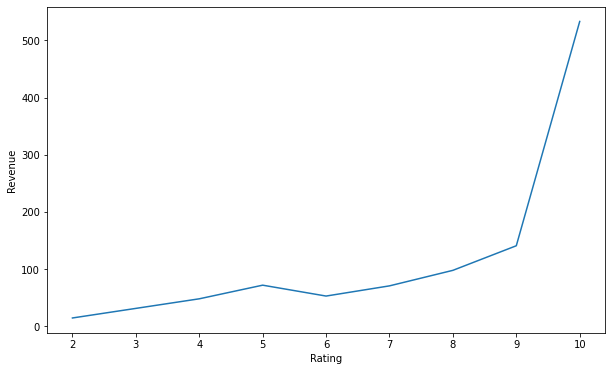

Then we analayzed the relationship between the actors and the ratings of the movies. Which showed us that it is impossible make a conclusion between the rating of a movie, then the revenue of that movie because movies with lower votes had much higher ratings than the movies with higher rate of votes.

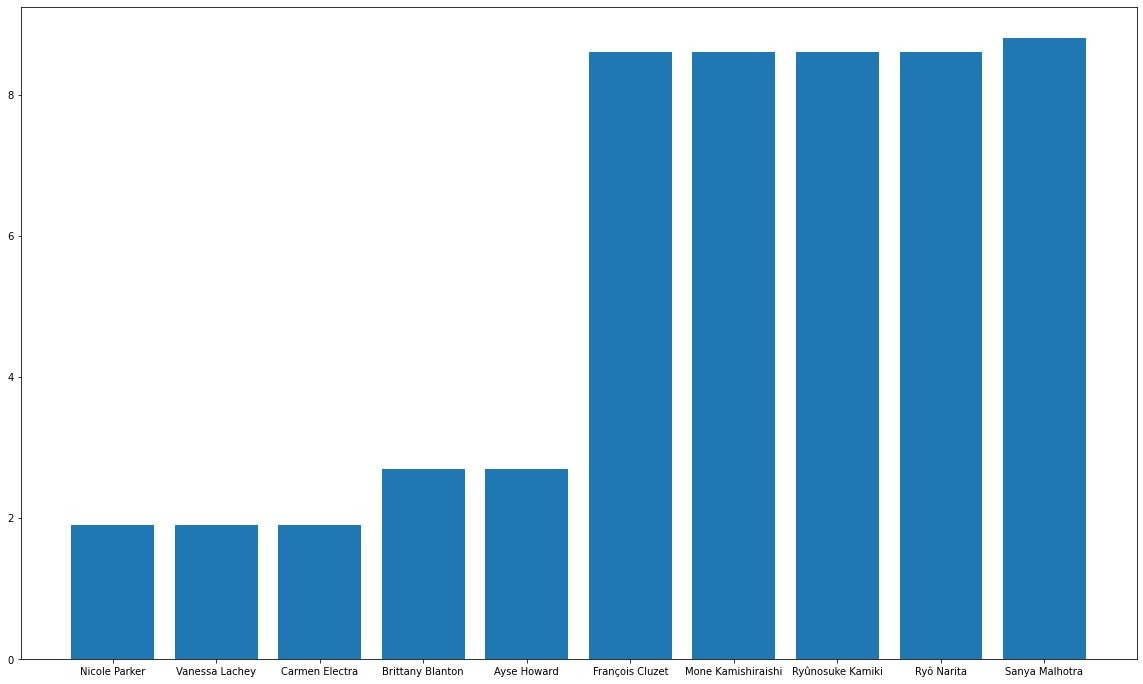

Therefore we concluded that at this stage of the project it is better to not include the relationships between the columns rating and Actors.


Then we tried to find the relations between the Gere and Rating columns and and observed how Ratings can change according to the Genre column.


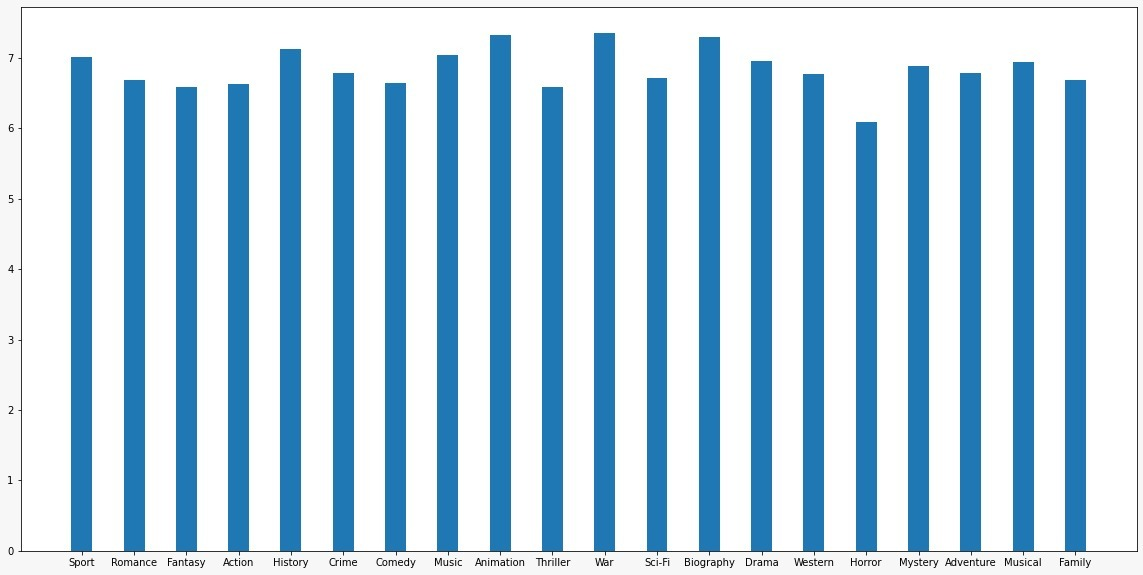

### Results With Machine Learning Process

Before going further in to machine learning process we decided to solve our reliability issue first. To do so we set a certain value to ignore results which have lower votes.

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/MyDrive/cs210proj/"

import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

%matplotlib inline

fname =  "IMDB-Movie-Data-withID.csv"

df = pd.read_csv(join(path_prefix, fname))
df.head()

Mounted at ./drive


,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0


### The reliability point is set to be votes higher than 10000, All NaN values are dropped


In [ ]:
df = df[df['Votes'] > 10000]
df = df.dropna()
df


### Pre Desing of the Model

All the columns that does not have effect on the revenue values are dropped.
These columns are decided with test similiar to the ones in the Ultilization of The Data Sets part.


In [ ]:
df = df.drop(columns = ["Unnamed: 0", "Rank", "Title", "Genre", "Description", "Director", "Actors", "Year", "Votes", "imdbID", "movieLensID"])
df
df['Revenue (Millions)'] = df['Revenue (Millions)'].round()

### Deciding on What to predict

After making the necessary preperations we decided on what the program will predict.


### First option: Truth Table

In [ ]:
meanRev = df["Revenue (Millions)"].mean()
meanRu = df["Runtime (Minutes)"].mean()
meanra = df["Rating"].mean()
meanm = df["Metascore"].mean()

conditions = [df["Revenue (Millions)"]< meanRev,
              df["Revenue (Millions)"]>= meanRev]
values = [0, 1]
df["Truth_Class"] = np.select(conditions, values, default=0)
df

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
X = df[['Metascore', 'Rating', 'Runtime (Minutes)']]
y = df['Truth_Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_r, X_valid, y_r, y_valid = train_test_split(X_test,y_test,random_state=0, test_size=0.5)

model = RandomForestClassifier(n_estimators=100, random_state=42)
Grad_model = GradientBoostingClassifier(n_estimators=100,random_state =42)
model.fit(X_train, y_train)
Grad_model.fit(X_train,y_train)
accuracy1 = model.score(X_test, y_test)
print('Gradient Test accuracy:', accuracy1)

new_data1 = [[meanm, meanra, meanRu]]
prediction1 = model.predict(new_data1)
print('Gradient Predicted revenue:', prediction1)

accuracy = model.score(X_test, y_test)
print('Random Forest Test accuracy:', accuracy)

new_data = [[meanm, meanra, meanRu]]
prediction = model.predict(new_data)
print('Random Forest Predicted revenue:', prediction)

Gradient Test accuracy: 0.7133757961783439
Gradient Predicted revenue: [0]
Random Forest Test accuracy: 0.7133757961783439
Random Forest Predicted revenue: [0]


### Extra Notes
After seeing that Both GradientBoosting model and Random Forest model were giving the same results we decided to pick only one of them since it would not make much difference. We shifted our attention to how a model would react to certain choice of data.

[]

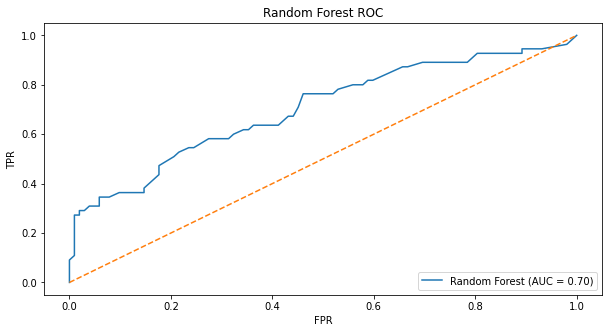

In [ ]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve,roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, boundary1 = roc_curve(y_test, y_proba)

fig, ax1 = plt.subplots(1, figsize=(10, 5))


ax1.plot(fpr,tpr,label= "Random Forest (AUC = "+str("%.2f" % auc(fpr,tpr))+')')
ax1.plot([0, 1], [0, 1], '--')
ax1.set_xlabel('FPR')
ax1.set_ylabel('TPR')
ax1.set_title('Random Forest ROC')
ax1.legend(loc='lower right')

plt.plot()

### With Truth Table
Program was able to show accurate results more than expected. We expected it to be low since our data that we fed to the machine learning program was small. From the plot and the accuracy of 0.7, we concluded that this program is able to give good predictions of a film's revenue. But the given table only explains if the revenue is above a certain threshold (mean). So we decided to do the second prediction model using the revenue values.

### Second Option: Revenue Values


In [ ]:
X = df[['Metascore', 'Rating', 'Runtime (Minutes)']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_r, X_valid, y_r, y_valid = train_test_split(X_test,y_test,random_state=0, test_size=0.5)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Test accuracy:', accuracy)

new_data = [[meanm, meanra, meanRu]]
prediction = model.predict(new_data)
print('Predicted revenue:', prediction)

Test accuracy: 0.006369426751592357
Predicted revenue: [24.]


# With Revenue Values
The prediction target was very detailed when we used Revenue models. But the accuracy score was really low so it would not mean anything to use revenues as the target. We tried to make some alterations to make the predicting better but after realising we are coming close what we did for the truth table we decided to abort it.

## Our Aim When Starting this Project, Comparisons, Conclusions


In the final report we aim to overcome our reliability problem and make the connections between columns clear. Then we aim to make a program which can make accurate decisions based on the data provided.


Reliability issue was mostly discarded after setting a certain threshold. Then making the model the accurately predict the outcome of revenues, we understood that it is better to give a general idea of how the outcome would be better then trying to predict the detailed outcome.
